### PRIMER PROYECTO CURSO DATA SCIENCE - ACAMICA
### Nombre : Sebastián Romero


# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

Para determinar el precio de venta de una propiedad se deben tener en cuenta las caracteristicas de este, como son superficie total, número de alcobas, número de baños, parqueadero, cuarto útil, acabados de la propiedad (acabados de la cocina, enchapados y cabinas del baño, si tiene armarios en las alcobas y lo estados de estos), ubicación de la propiedad (ciudad, barrio o sector, si se trata de una propiedad horizontal la altura a la que se ubica) y las zonas comunes si se trata de un conjunto residencial (gimnasio, piscina, parque infantil, placas deportivas)

### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.


#### 2.1 Desafío
En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.

0. Importa las librerías necesarias para trabajar en la consigna.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [2]:
datos = pd.read_csv("DS_Proyecto_01_Datos_Properati.csv",sep=',');

In [3]:
print(f"el dataset tiene {datos.iloc[:,0].count()} filas")
print(f"el dataset tiene {datos.iloc[0,:].count()} columnas")
print(f"el tamaño del dataset es : {datos.shape}")
a , b = datos.shape
datos.head(5)

el dataset tiene 146660 filas
el dataset tiene 19 columnas
el tamaño del dataset es : (146660, 19)


,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [4]:
print("valores faltantes por columna")
datos.isna().sum()

valores faltantes por columna


start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

In [5]:
instancias_propiedades = datos["property_type"].value_counts()
print("número de instancias por tipo de propiedad")
print(instancias_propiedades)

número de instancias por tipo de propiedad
Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64


In [6]:
porcentaje_propiedades = 100*datos["property_type"].value_counts(normalize=True)
print("porcentaje de instancias por tipo de propiedad")
print(porcentaje_propiedades)
print(f"El porcentaje total de los tipos de propiedad minoritarios (Otros) es {porcentaje_propiedades[3:].sum()}")

porcentaje de instancias por tipo de propiedad
Departamento       73.180145
Casa               14.674076
PH                  9.749080
Lote                0.894586
Oficina             0.448657
Otro                0.255012
Local comercial     0.221601
Casa de campo       0.219555
Depósito            0.180690
Cochera             0.176599
Name: property_type, dtype: float64
El porcentaje total de los tipos de propiedad minoritarios (Otros) es 2.396699849993181


Hay una gran mayoria de las propiedades que pertenecen al tipo Departamentos (73,2%) seguido de Casa (14,7%) y PH (9,8%). A partir de ahí se observar varios mas tipos de propiedad minoritarios (Otros) que juntos suman solo 2.3%
Para facilitar la visualización agruparemos este último grupo como Otros

In [7]:
instancias_propiedades["Otros"] = instancias_propiedades[3:].sum()
instancias_propiedades.drop(instancias_propiedades.index[3:-1], inplace=True)

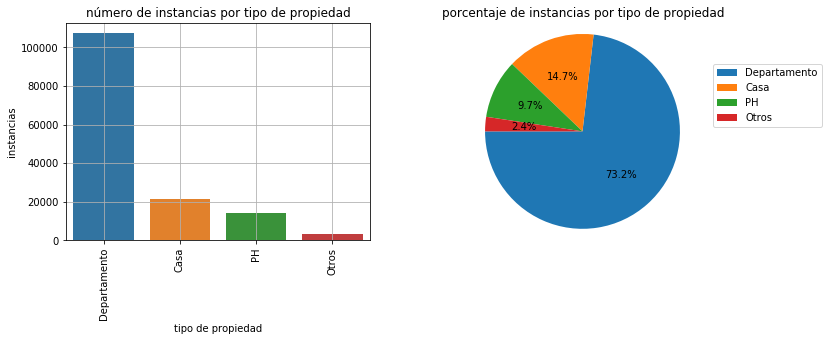

In [8]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
sns.barplot(data = instancias_propiedades.to_frame(), x=instancias_propiedades.index, y=instancias_propiedades)
plt.title("número de instancias por tipo de propiedad")
plt.xlabel("tipo de propiedad")
plt.ylabel("instancias")
plt.xticks(rotation=90)
plt.grid()
plt.subplot(1,2,2)
plt.title("porcentaje de instancias por tipo de propiedad")
labels = instancias_propiedades.index
sizes = instancias_propiedades
patches, texts, num = plt.pie(sizes, shadow=False, startangle=180, autopct='%1.1f%%')
plt.legend(patches, labels,bbox_to_anchor=(1.3,0.5),loc=4)
plt.axis('equal')
plt.show()

Aquí se presenta de manera gráfica la información arriba obtenida como series, se puede ver la gran cantidad de instancias que pertenece a Departamento, seguido de PH y Casa. Los demás tipos de propiedad son mucho menores y en los gráficos no se visualizarian bien, por lo tanto se agrupan en la categoría Otros.

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

In [9]:
instancias_region = datos["l2"].value_counts()
print("número de instancias por region")
print(instancias_region)

número de instancias por region
Capital Federal             92539
Bs.As. G.B.A. Zona Norte    24282
Bs.As. G.B.A. Zona Sur      17173
Bs.As. G.B.A. Zona Oeste    12666
Name: l2, dtype: int64


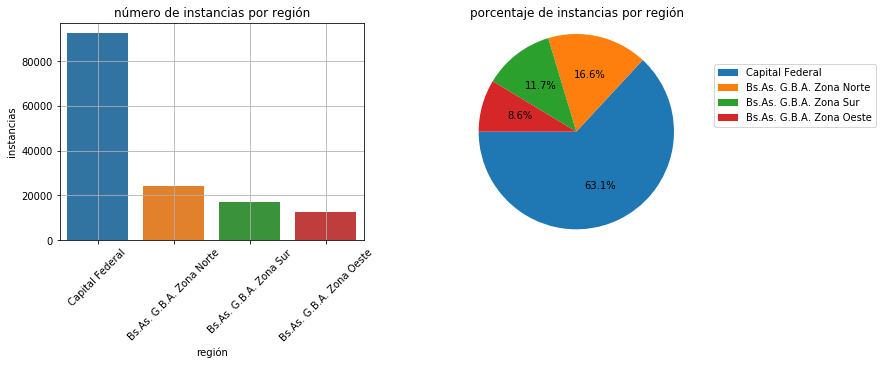

In [10]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
sns.countplot(data = datos, x = "l2", order = datos["l2"].value_counts(ascending=False).index)
plt.title("número de instancias por región")
plt.xlabel("región")
plt.ylabel("instancias")
plt.xticks(rotation=45)
plt.grid()
plt.subplot(1,2,2)
plt.title("porcentaje de instancias por región")
labels = datos["l2"].value_counts().index
sizes = datos["l2"].value_counts()
patches, texts, num = plt.pie(sizes, shadow=False, startangle=180, autopct='%1.1f%%')
plt.legend(patches, labels,bbox_to_anchor=(1.5,0.5),loc=4)
plt.axis('equal')
plt.show()

Se observa que una gran mayoria de las propiedades se encuentra en la Capital Federal (63,1%), seguido por zona norte (16.6%), zona sur (11.7%) y zona oeste (8.6%)

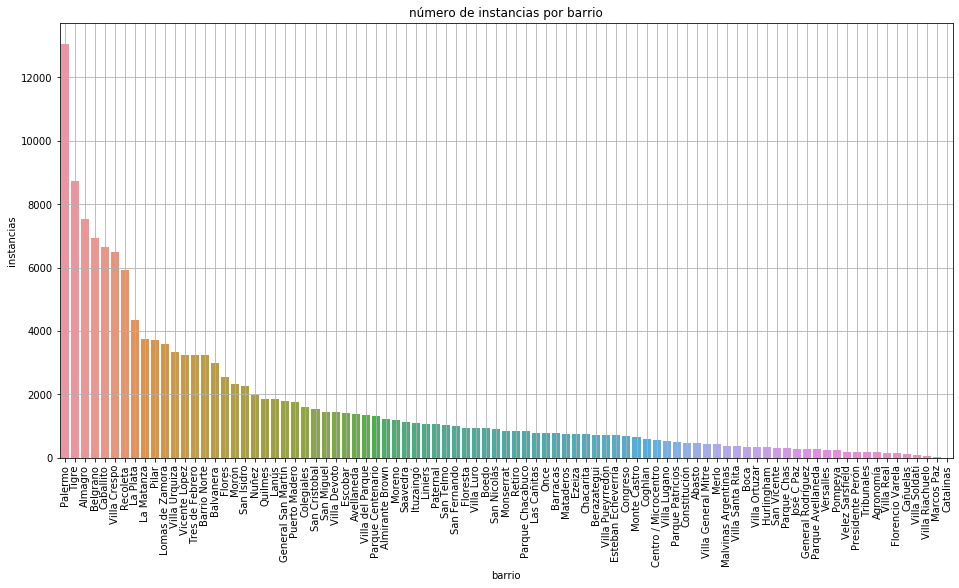

In [11]:
plt.figure(figsize = (16,8))
sns.countplot(data = datos, x = "l3", order = datos["l3"].value_counts(ascending=False).index)
plt.title("número de instancias por barrio")
plt.xlabel("barrio")
plt.ylabel("instancias")
plt.xticks(rotation=90)
plt.grid()

De la gráfica se observa que los barrios con mas instancias son Palermo,Tigre, Almagro, Belgrano, Caballito, Villa Crespo y Recoleta

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

In [12]:
datos = datos[((datos.property_type==instancias_propiedades.index[0]) | 
               (datos.property_type==instancias_propiedades.index[1]) |
               (datos.property_type==instancias_propiedades.index[2])) & 
              (datos.l2==instancias_region.index[0])]  
datos.shape

(91485, 19)

A partir de ahora utilizaremos estos datos filtrados para el análisis exploratorio de datos (EDA) y desarrollar los modelos predictivos (ML)

**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

Antes de analizar la distribución y relaciones de las diferentes caracteristicas, vamos a modificar las las caracteristicas que nos refieren al momento de alta y baja de los anuncios de venta, dado que se preentan como fechas y por si solas no nos brindan gran utilidad; en lugar de eso vamos a generar una nueva caracteristica que será los dias de publicación del anuncio y está dada  como fecha final menos fecha inicial de publicación.

Esta nueva caracteristica tendrá entradas faltantes ya que faltan algunas fechas. Para no sesgar el dataset por una caracteristica secundaria que se creó, estos valores se van a fijar como la mediana para la caracteristica (no se usa la media debido a la gran dispersión de los outliers).

In [13]:
datos['end_date'] = pd.to_datetime(datos['end_date'], errors = 'coerce')
datos['start_date'] = pd.to_datetime(datos['start_date'], errors = 'coerce')
datos["dias_publicados"] = (datos['end_date'] - datos['start_date'])/np.timedelta64(1, 'D')
datos["dias_publicados"] = np.where(np.isnan(datos["dias_publicados"]), datos["dias_publicados"].median(), 
                                    datos["dias_publicados"])

Vamos a revisar los tipos de datos de cada caracteristica, lo que nos permitirá entender que caracteristicas son númericas y cuales no, para analizar estas de la manera adecuada

In [14]:
print("los diferentes tipos de datos para cada caracteristica son: ")
print(datos.dtypes)

los diferentes tipos de datos para cada caracteristica son: 
start_date         datetime64[ns]
end_date           datetime64[ns]
created_on                 object
lat                       float64
lon                       float64
l1                         object
l2                         object
l3                         object
rooms                     float64
bedrooms                  float64
bathrooms                 float64
surface_total             float64
surface_covered           float64
price                     float64
currency                   object
title                      object
description                object
property_type              object
operation_type             object
dias_publicados           float64
dtype: object


previamente revisamos la distribución de tipos de propiedad (property_tipe) y la ubicación por región y barrio (l1, l2, l3), como vimos estas son variables categóricas.

las fechas fueron modificadas para obtener una variable númerica (dias_publicados) que puede ser analizada.

las caracteristicas rooms, bredrooms, bathrooms, surface_total y surface_covered y price son variables númericas que podemos analizar.

latitud y longitud son variables numéricas que nos presentan las coordenadas de ubicación de cada propiedad, para el alcance de este proyecto no serán tenidas en cuenta, ya que con la ubicación por región y barrio es suficiente.

In [15]:
print(datos.currency.value_counts())
print(datos.operation_type.value_counts())

USD    91485
Name: currency, dtype: int64
Venta    91485
Name: operation_type, dtype: int64


currency indica la moneda a la cual está el precio (USD para todas las propiedades) y operation_type es el tipo de operación que se esta realizando con la propiedad (venta para todas las propiedades), por lo tanto son caracteristicas redundantes que no requieren análisis.

title y description son cadenas de texto que presentan cada tipo de propiedad, por lo tanto no se caracteristicas que podamos analizar (almenos con el alcance de este proyecto)

Lo siguiente será eliminar las instancias duplicadas, ya que al presentarse una propiedad de manera duplicada estaría dandosele a esta un peso mayor durante el desarrollo del EDA y modelos de ML

In [16]:
datos.drop_duplicates(inplace=True)

Lo siguiente será verificar los valores faltantes en el dataset

In [17]:
datos.isna().sum()

start_date             0
end_date           10969
created_on             0
lat                 4381
lon                 4395
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           2147
surface_total       8717
surface_covered     9024
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dias_publicados        0
dtype: int64

Se observa que hay instancias con valores faltantes para las caracteristicas surface_total y bathrooms, por lo que se eliminaran esta instancias.

In [18]:
datos.dropna(subset=["bathrooms","surface_total"], inplace=True)

Algunas instancias tienen valores vacios en surface_covered. Una buena aproximación al valor de esta caracteristica es asumir que toda la superficie está cubierta, de manera tal que surface_covered = surface_total.
Tambien debemos revisar si existen instancias para las cuales la superficie cubierta sea mayor a la superficie total, ya que esto no es posible (puede tratarse de un error al digitar). En este caso se puede hacer la misma consideración arriba presentada, surface_covered = surface_total

In [19]:
datos["surface_covered"] = np.where(np.isnan(datos["surface_covered"]), datos["surface_total"], datos["surface_covered"])
datos["surface_covered"] = np.where(datos["surface_covered"] > datos["surface_total"], 
                                    datos["surface_total"], datos["surface_covered"])

Finalmente eliminamos las caracteristicas que no utilizaremos y podemos observar como se hizo la limpieza de valores nulos en las caracteristicas que consideraremos para el EDA

In [20]:
datos.drop(["lat","lon","start_date","end_date","created_on","title","description","currency","operation_type"], 
           axis=1, inplace=True)
datos.isna().sum()

l1                 0
l2                 0
l3                 0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
property_type      0
dias_publicados    0
dtype: int64

Antes de desarrollar el análisis exploratorio de datos, buscaremos en primera instancia algunos estadísticos para cada variable y así podremos tener una primera idea que nos permita desarrollar el análisis

In [21]:
datos.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,dias_publicados
count,80273.000000,80273.000000,80273.000000,80273.000000,80273.000000,8.027300e+04,80273.000000
mean,3.011610,2.003276,1.553125,113.017042,92.490152,2.648492e+05,44.393956
std,1.313573,1.052585,0.853168,994.190624,774.328016,3.299373e+05,52.424683
min,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03,0.000000
25%,2.000000,1.000000,1.000000,49.000000,44.000000,1.250000e+05,13.000000
50%,3.000000,2.000000,1.000000,71.000000,63.000000,1.800000e+05,20.000000
75%,4.000000,3.000000,2.000000,111.000000,96.000000,2.800000e+05,62.000000
max,26.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07,427.000000


Los estadísticos nos permiten inferir que dentro de las instancias existen propiedades sobredimensionadas (como mansiones) que generan unos valores maximos enormes.

### Análisis de la Superficie total (surface_total)

lo primero que analizaremos es la distribución de la superficie total de las propiedades, para ellos revisaremos su diagrama de cajas para identificar los valores extremos y fijaremos el valor máximo para elaborar los histogramas de frecuencias, de una manera clara, sin que su visualización se afecte por los outliers.

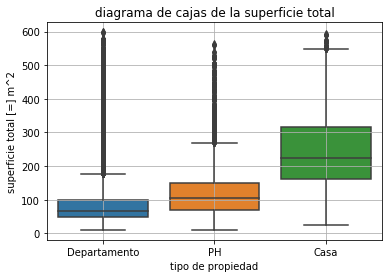

In [22]:
max_val1 = 600
sns.boxplot(x =datos["property_type"] , y = datos["surface_total"][datos["surface_total"] < max_val1])
plt.title("diagrama de cajas de la superficie total")
plt.xlabel("tipo de propiedad")
plt.ylabel("superficie total [=] m^2")
plt.grid()

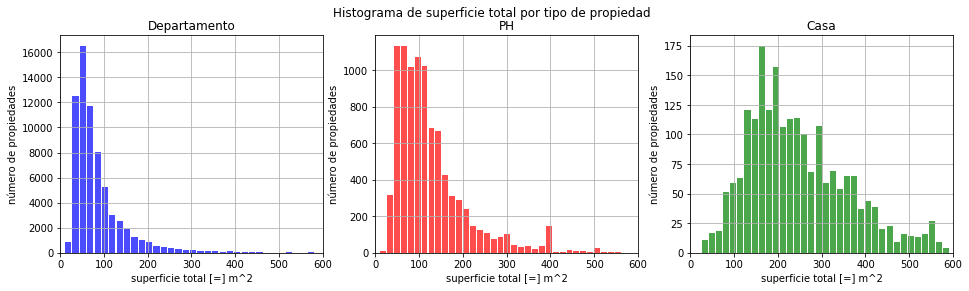

In [23]:
plt.figure(figsize = (16,4))
plt.suptitle("Histograma de superficie total por tipo de propiedad")
plt.subplot(1,3,1)
sns.distplot(datos["surface_total"][(datos["surface_total"]<max_val1)&(datos["property_type"]=="Departamento")], 
             bins = 35, hist=True, kde=False, hist_kws={"color":"b", "linewidth": 3,"alpha": 0.7, "rwidth":0.85})
plt.xlim(0,max_val1)
plt.title("Departamento")
plt.xlabel("superficie total [=] m^2")
plt.ylabel("número de propiedades")
plt.grid()
plt.subplot(1,3,2)
sns.distplot(datos["surface_total"][(datos["surface_total"]<max_val1)&(datos["property_type"]=="PH")], 
             bins = 35, hist=True, kde=False, hist_kws={"color":"r", "linewidth": 3,"alpha": 0.7, "rwidth":0.85})
plt.xlim(0,max_val1)
plt.title("PH")
plt.xlabel("superficie total [=] m^2")
plt.ylabel("número de propiedades")
plt.grid()
plt.subplot(1,3,3)
sns.distplot(datos["surface_total"][(datos["surface_total"]<max_val1)&(datos["property_type"]=="Casa")], 
             bins = 35, hist=True, kde=False, hist_kws={"color":"g", "linewidth": 3,"alpha": 0.7, "rwidth":0.85})
plt.xlim(0,max_val1)
plt.title("Casa")
plt.xlabel("superficie total [=] m^2")
plt.ylabel("número de propiedades")
plt.grid()
plt.show()

Del gráfico de cajas se determina que se pueden considerar outliers para esta caracteristica los valores mayores a 600.

Se observa que para Departamento y PH la mayoria de las instancias tiene menos de 200 metros cuadrados de superficie total, mientras que para Casa la superficie total toma valores mas altos.

### Análisis de la Superficie cubierta (surface_covered)

Siguiendo el razonamiento utilizado para la caracteristica arriba análizada tenemos lo siguiente

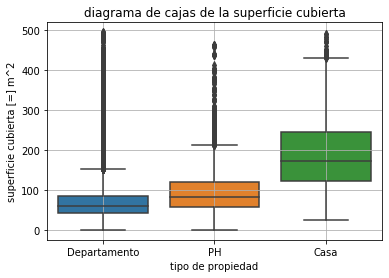

In [24]:
max_val2 = 500
sns.boxplot(x =datos["property_type"] , y = datos["surface_covered"][datos["surface_covered"] < max_val2])
plt.title("diagrama de cajas de la superficie cubierta")
plt.xlabel("tipo de propiedad")
plt.ylabel("superficie cubierta [=] m^2")
plt.grid()

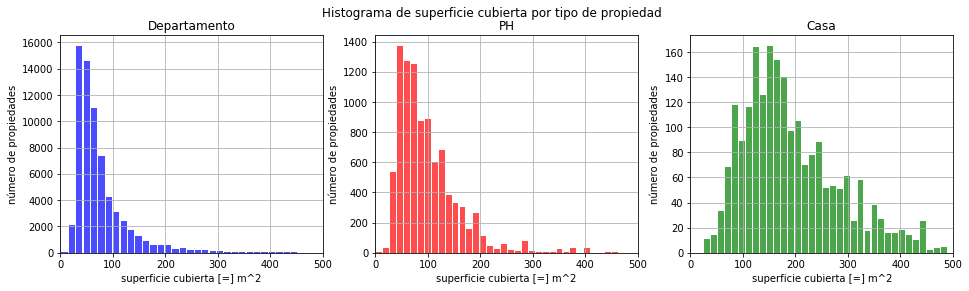

In [25]:
plt.figure(figsize = (16,4))
plt.suptitle("Histograma de superficie cubierta por tipo de propiedad")
plt.subplot(1,3,1)
sns.distplot(datos["surface_covered"][(datos["surface_covered"]<max_val2)&(datos["property_type"]=="Departamento")], 
             bins = 35, hist=True, kde=False, hist_kws={"color":"b", "linewidth": 3,"alpha": 0.7, "rwidth":0.85})
plt.xlim(0,max_val2)
plt.title("Departamento")
plt.xlabel("superficie cubierta [=] m^2")
plt.ylabel("número de propiedades")
plt.grid()
plt.subplot(1,3,2)
sns.distplot(datos["surface_covered"][(datos["surface_covered"]<max_val2)&(datos["property_type"]=="PH")], 
             bins = 35, hist=True, kde=False, hist_kws={"color":"r", "linewidth": 3,"alpha": 0.7, "rwidth":0.85})
plt.xlim(0,max_val2)
plt.title("PH")
plt.xlabel("superficie cubierta [=] m^2")
plt.ylabel("número de propiedades")
plt.grid()
plt.subplot(1,3,3)
sns.distplot(datos["surface_covered"][(datos["surface_covered"]<max_val2)&(datos["property_type"]=="Casa")], 
             bins = 35, hist=True, kde=False, hist_kws={"color":"g", "linewidth": 3,"alpha": 0.7, "rwidth":0.85})
plt.xlim(0,max_val2)
plt.title("Casa")
plt.xlabel("superficie cubierta [=] m^2")
plt.ylabel("número de propiedades")
plt.grid()
plt.show()

Del gráfico de cajas se determina que se pueden considerar outliers para esta caracteristica los valores mayores a 500.

De manera análoga a la caracteristica superficie total, se observa que para Departamento y PH la mayoria de las instancias tiene menos de 200 metros cuadrados de superficie cubierta, mientras que para Casa esta toma valores mas altos.

### Análisis del número de ambientes (rooms)

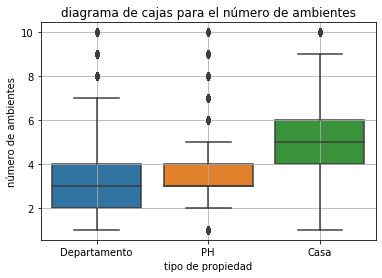

In [26]:
max_val3 = 11
sns.boxplot(x =datos["property_type"] , y = datos["rooms"][datos["rooms"] < max_val3])
plt.title("diagrama de cajas para el número de ambientes")
plt.xlabel("tipo de propiedad")
plt.ylabel("número de ambientes")
plt.grid()

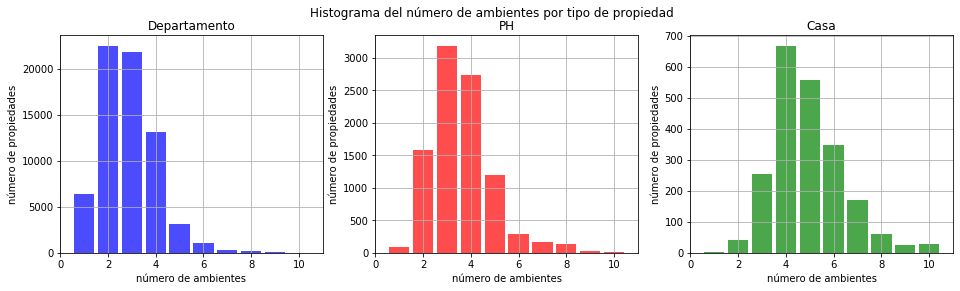

In [27]:
plt.figure(figsize = (16,4))
plt.suptitle("Histograma del número de ambientes por tipo de propiedad")
plt.subplot(1,3,1)
sns.distplot(datos["rooms"][(datos["rooms"]<max_val3)&(datos["property_type"]=="Departamento")], 
             bins=np.arange(0.5,max_val3+1.5), hist=True, kde=False, 
             hist_kws={"color":"b", "linewidth": 3,"alpha": 0.7, "rwidth":0.85})
plt.xlim(0,max_val3)
plt.title("Departamento")
plt.xlabel("número de ambientes")
plt.ylabel("número de propiedades")
plt.grid()
plt.subplot(1,3,2)
sns.distplot(datos["rooms"][(datos["rooms"]<max_val3)&(datos["property_type"]=="PH")], 
             bins=np.arange(0.5,max_val3+1.5), hist=True, kde=False, 
             hist_kws={"color":"r", "linewidth": 3,"alpha": 0.7, "rwidth":0.85})
plt.xlim(0,max_val3)
plt.title("PH")
plt.xlabel("número de ambientes")
plt.ylabel("número de propiedades")
plt.grid()
plt.subplot(1,3,3)
sns.distplot(datos["rooms"][(datos["rooms"]<max_val3)&(datos["property_type"]=="Casa")], 
             bins=np.arange(0.5,max_val3+1.5), hist=True, kde=False, 
             hist_kws={"color":"g", "linewidth": 3,"alpha": 0.7, "rwidth":0.85})
plt.xlim(0,max_val3)
plt.title("Casa")
plt.xlabel("número de ambientes")
plt.ylabel("número de propiedades")
plt.grid()
plt.show()

Del gráfico de cajas se determina que se pueden considerar outliers para el número de espacios los valores mayores a 10.

Se observa que para Departamento y PH la mayoria de las instancias tiene entre 2 y 4 espacios, mientras que para Casa la mayoria de las instancias está entre 3 y 6 espacios.

### Análisis del número de dormitorios (bedrooms)

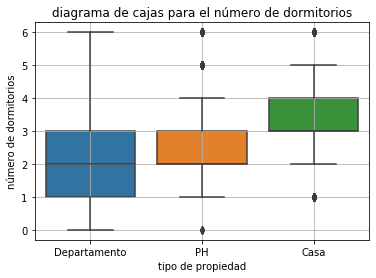

In [28]:
max_val4 = 7
sns.boxplot(x =datos["property_type"] , y = datos["bedrooms"][datos["bedrooms"] < max_val4])
plt.title("diagrama de cajas para el número de dormitorios")
plt.xlabel("tipo de propiedad")
plt.ylabel("número de dormitorios")
plt.grid()

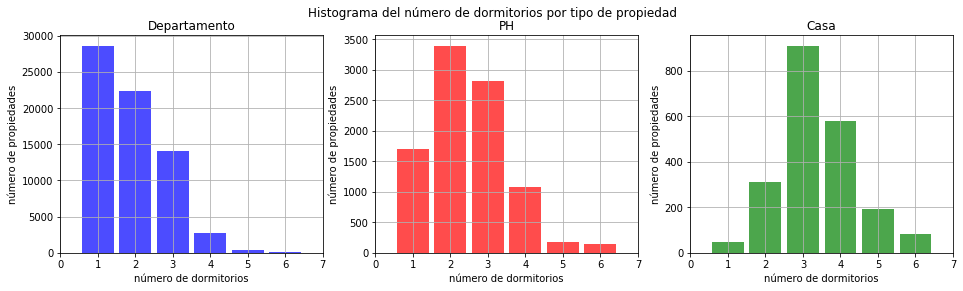

In [29]:
plt.figure(figsize = (16,4))
plt.suptitle("Histograma del número de dormitorios por tipo de propiedad")
plt.subplot(1,3,1)
sns.distplot(datos["bedrooms"][(datos["bedrooms"]<max_val4)&(datos["property_type"]=="Departamento")], 
             bins=np.arange(0.5,max_val4+1.5), hist=True, kde=False, 
             hist_kws={"color":"b", "linewidth": 3,"alpha": 0.7, "rwidth":0.85})
plt.xlim(0,max_val4)
plt.title("Departamento")
plt.xlabel("número de dormitorios")
plt.ylabel("número de propiedades")
plt.grid()
plt.subplot(1,3,2)
sns.distplot(datos["bedrooms"][(datos["bedrooms"]<max_val4)&(datos["property_type"]=="PH")], 
             bins=np.arange(0.5,max_val4+1.5), hist=True, kde=False, 
             hist_kws={"color":"r", "linewidth": 3,"alpha": 0.7, "rwidth":0.85})
plt.xlim(0,max_val4)
plt.title("PH")
plt.xlabel("número de dormitorios")
plt.ylabel("número de propiedades")
plt.grid()
plt.subplot(1,3,3)
sns.distplot(datos["bedrooms"][(datos["bedrooms"]<max_val4)&(datos["property_type"]=="Casa")], 
             bins=np.arange(0.5,max_val4+1.5), hist=True, kde=False, 
             hist_kws={"color":"g", "linewidth": 3,"alpha": 0.7, "rwidth":0.85})
plt.xlim(0,max_val4)
plt.title("Casa")
plt.xlabel("número de dormitorios")
plt.ylabel("número de propiedades")
plt.grid()
plt.show()

Del gráfico de cajas se determina que se pueden considerar outliers para el número de dormitorios los valores mayores a 7.

Se observa que para Departamento la mayoria de las instancias tiene entre 1 y 3 dormitorios, para PH entre 1 y 4 dormitorios y para Casa entre 2 y 5 dormitorios.

### Análisis del número de baños (bathrooms)

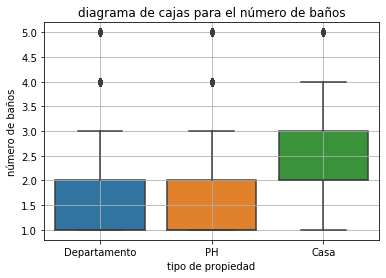

In [30]:
max_val5 = 6
sns.boxplot(x =datos["property_type"] , y = datos["bathrooms"][datos["bathrooms"] < max_val5])
plt.title("diagrama de cajas para el número de baños")
plt.xlabel("tipo de propiedad")
plt.ylabel("número de baños")
plt.grid()

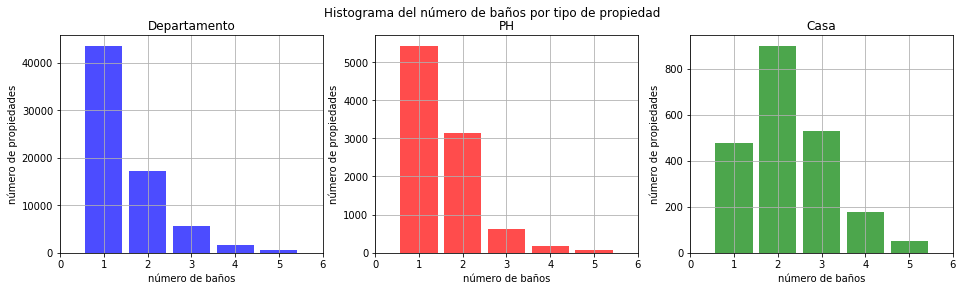

In [31]:
plt.figure(figsize = (16,4))
plt.suptitle("Histograma del número de baños por tipo de propiedad")
plt.subplot(1,3,1)
sns.distplot(datos["bathrooms"][(datos["bathrooms"]<max_val5)&(datos["property_type"]=="Departamento")], 
             bins=np.arange(0.5,max_val5+1.5), hist=True, kde=False, 
             hist_kws={"color":"b", "linewidth": 3,"alpha": 0.7, "rwidth":0.85})
plt.xlim(0,max_val5)
plt.title("Departamento")
plt.xlabel("número de baños")
plt.ylabel("número de propiedades")
plt.grid()
plt.subplot(1,3,2)
sns.distplot(datos["bathrooms"][(datos["bathrooms"]<max_val5)&(datos["property_type"]=="PH")], 
             bins=np.arange(0.5,max_val5+1.5), hist=True, kde=False, 
             hist_kws={"color":"r", "linewidth": 3,"alpha": 0.7, "rwidth":0.85})
plt.xlim(0,max_val5)
plt.title("PH")
plt.xlabel("número de baños")
plt.ylabel("número de propiedades")
plt.grid()
plt.subplot(1,3,3)
sns.distplot(datos["bathrooms"][(datos["bathrooms"]<max_val5)&(datos["property_type"]=="Casa")], 
             bins=np.arange(0.5,max_val5+1.5), hist=True, kde=False, 
             hist_kws={"color":"g", "linewidth": 3,"alpha": 0.7, "rwidth":0.85})
plt.xlim(0,max_val5)
plt.title("Casa")
plt.xlabel("número de baños")
plt.ylabel("número de propiedades")
plt.grid()
plt.show()

Del gráfico de cajas se determina que se pueden considerar outliers para el número de baños los valores mayores a 5.

Se observa que para Departamento y PH la mayoria de las instancias tiene entre 1 y 2 baños, mientras que para Casa la mayoria de las instancias está entre 1 y 3 baños.

### Análisis del precio (price)

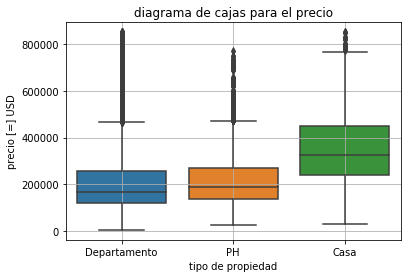

In [32]:
max_val6 = 850000
sns.boxplot(x =datos["property_type"] , y = datos["price"][datos["price"] < max_val6])
plt.title("diagrama de cajas para el precio")
plt.xlabel("tipo de propiedad")
plt.ylabel("precio [=] USD")
plt.grid()

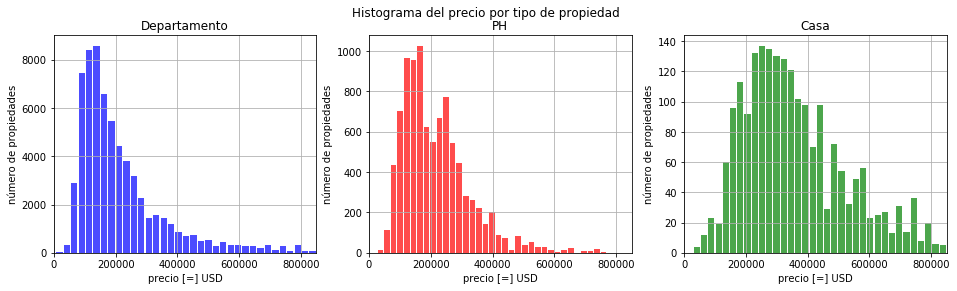

In [33]:
plt.figure(figsize = (16,4))
plt.suptitle("Histograma del precio por tipo de propiedad")
plt.subplot(1,3,1)
sns.distplot(datos["price"][(datos["price"]<max_val6)&(datos["property_type"]=="Departamento")], 
             bins = 35, hist=True, kde=False, hist_kws={"color":"b", "linewidth": 3,"alpha": 0.7, "rwidth":0.85})
plt.xlim(0,max_val6)
plt.title("Departamento")
plt.xlabel("precio [=] USD")
plt.ylabel("número de propiedades")
plt.grid()
plt.subplot(1,3,2)
sns.distplot(datos["price"][(datos["price"]<max_val6)&(datos["property_type"]=="PH")], 
             bins = 35, hist=True, kde=False, hist_kws={"color":"r", "linewidth": 3,"alpha": 0.7, "rwidth":0.85})
plt.xlim(0,max_val6)
plt.title("PH")
plt.xlabel("precio [=] USD")
plt.ylabel("número de propiedades")
plt.grid()
plt.subplot(1,3,3)
sns.distplot(datos["price"][(datos["price"]<max_val6)&(datos["property_type"]=="Casa")], 
             bins = 35, hist=True, kde=False, hist_kws={"color":"g", "linewidth": 3,"alpha": 0.7, "rwidth":0.85})
plt.xlim(0,max_val6)
plt.title("Casa")
plt.xlabel("precio [=] USD")
plt.ylabel("número de propiedades")
plt.grid()
plt.show()

Del gráfico de cajas se determina que se pueden considerar outliers para el precio los valores mayores a 850000 USD

Se observa que para Departamento y PH la mayoria de las instancias está bajo los 300000 USD, mientras que para Casa la mayoria de las instancias está bajo 600000 USD

### Análisis de los días que duró la publicación (dias_publicados)

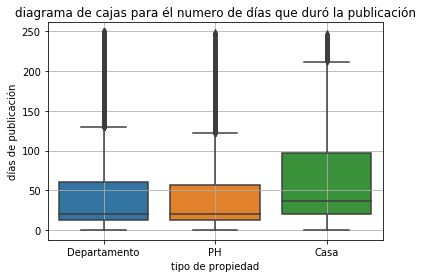

In [34]:
max_val7 = 250
sns.boxplot(x =datos["property_type"] , y = datos["dias_publicados"][datos["dias_publicados"] < max_val7])
plt.title("diagrama de cajas para él numero de días que duró la publicación")
plt.xlabel("tipo de propiedad")
plt.ylabel("días de publicación")
plt.grid()

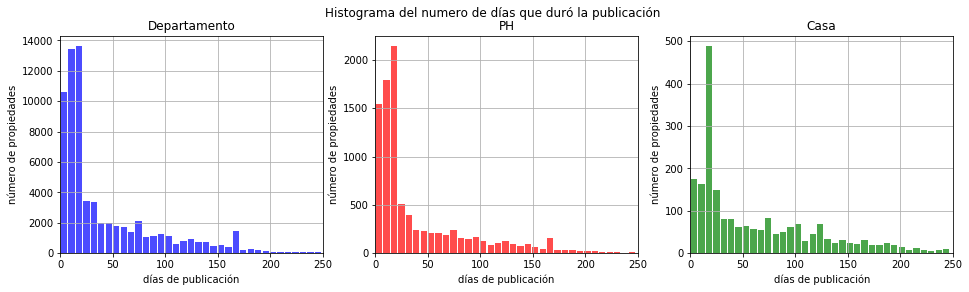

In [35]:
plt.figure(figsize = (16,4))
plt.suptitle("Histograma del numero de días que duró la publicación")
plt.subplot(1,3,1)
sns.distplot(datos["dias_publicados"][(datos["dias_publicados"]<max_val7)&(datos["property_type"]=="Departamento")], 
             bins = 35, hist=True, kde=False, hist_kws={"color":"b", "linewidth": 3,"alpha": 0.7, "rwidth":0.85})
plt.xlim(0,max_val7)
plt.title("Departamento")
plt.xlabel("días de publicación")
plt.ylabel("número de propiedades")
plt.grid()
plt.subplot(1,3,2)
sns.distplot(datos["dias_publicados"][(datos["dias_publicados"]<max_val7)&(datos["property_type"]=="PH")], 
             bins = 35, hist=True, kde=False, hist_kws={"color":"r", "linewidth": 3,"alpha": 0.7, "rwidth":0.85})
plt.xlim(0,max_val7)
plt.title("PH")
plt.xlabel("días de publicación")
plt.ylabel("número de propiedades")
plt.grid()
plt.subplot(1,3,3)
sns.distplot(datos["dias_publicados"][(datos["dias_publicados"]<max_val7)&(datos["property_type"]=="Casa")], 
             bins = 35, hist=True, kde=False, hist_kws={"color":"g", "linewidth": 3,"alpha": 0.7, "rwidth":0.85})
plt.xlim(0,max_val7)
plt.title("Casa")
plt.xlabel("días de publicación")
plt.ylabel("número de propiedades")
plt.grid()
plt.show()

Del gráfico de cajas se determina que se pueden considerar outliers para los días de publicación los valores mayores a 100.

Se observa que para Departamento y PH la mayoria de las instancias está bajo los 30 días, mientras que para Casa la mayoria de las instancias está bajo 50 días.

Tambien se observan picos en los valores que corresponden a la mediana (para Casa se hace muy distintivo frente a los demas días), que corresponde al llenado de los días que tenian valores nulos con la mediana de los datos existentes.

### Filtración de valores extremos identificados

Ahora fltraremos el dataset para no considerar todos los outliers identificados

In [36]:
datos = datos[(datos["surface_total"] <= max_val1) & 
              (datos["surface_covered"] <= max_val2) & 
              (datos["rooms"] <= max_val3) & 
              (datos["bedrooms"] <= max_val4) & 
              (datos["bathrooms"] <= max_val5) & 
              (datos["price"] <= max_val6) & 
              (datos["dias_publicados"] <= max_val7)] 
datos.shape

(76675, 11)

Las relaciones de a pares entre cada una de estas variables, discriminando por el tipo de propiedad, se observan los siguientes diagramas de dispersión

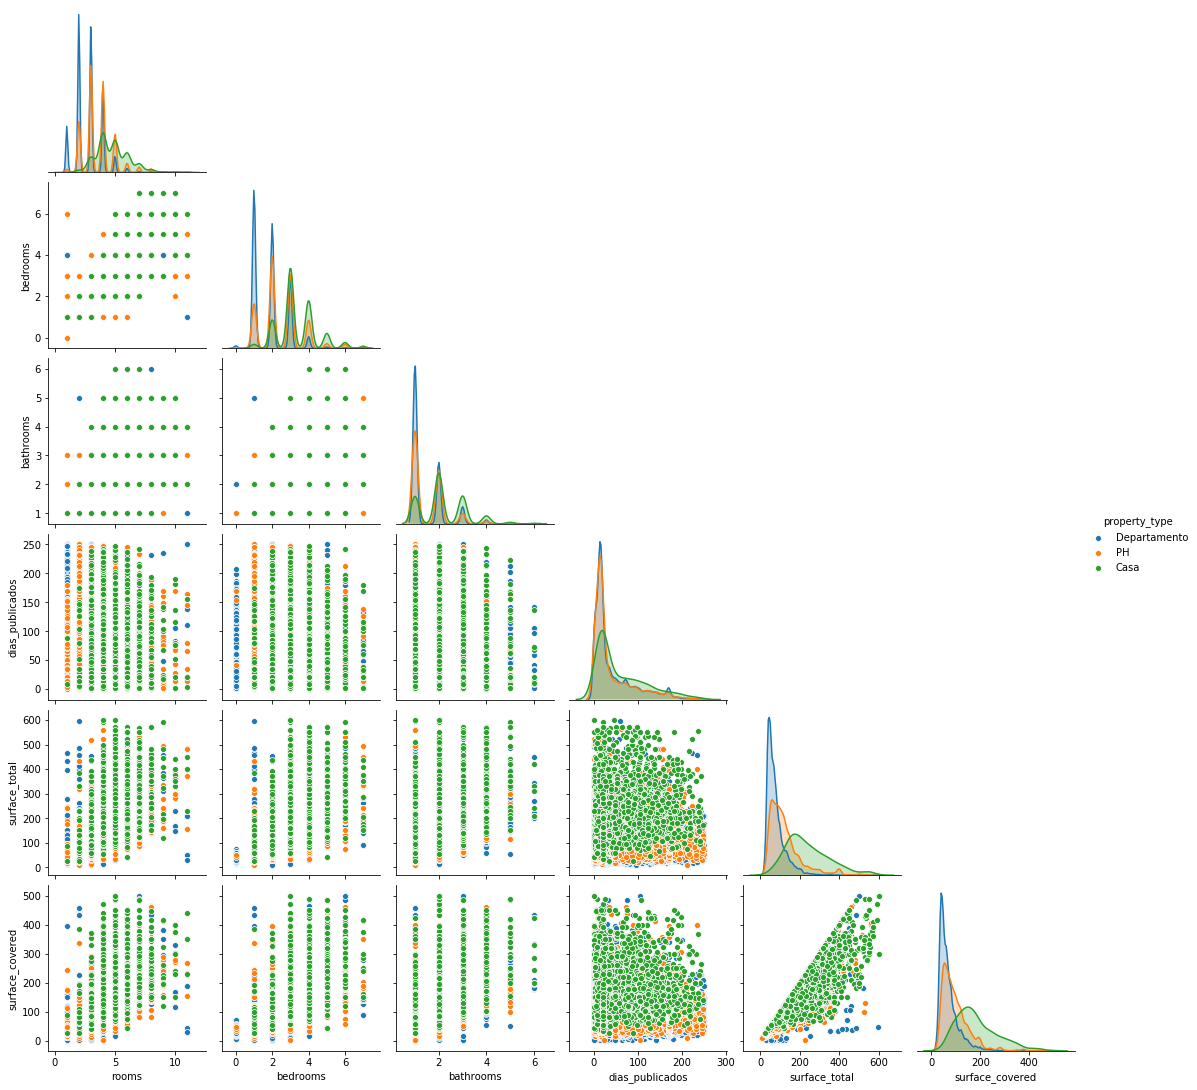

In [37]:
figura = sns.pairplot(datos, vars=["rooms","bedrooms","bathrooms","dias_publicados","surface_total","surface_covered"],
                      hue="property_type", corner=True)
plt.show()

Arriba se presentan las gráficas de dispersión de las diferentes variables numéricas variables (excluyendo el precio).

A continuación se presenta la gráfica de dispersión entre cada variable numérica y  el precio.

La razón para realizar dos graficas de pares en lugar de una, es para facilitar la visualización, por la cantidad de variables

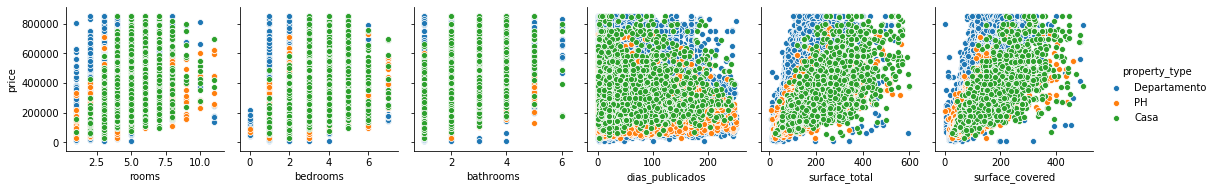

In [38]:
figura = sns.pairplot(datos,x_vars=["rooms","bedrooms","bathrooms","dias_publicados","surface_total","surface_covered"],
                      y_vars=["price"], hue="property_type")
plt.show()

6. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

Lo primero que haremos es estudiar las correlaciones de todas las variables numéricas en el dataset, esto lo haremos por medio de un mapa de calor para las correlaciones de Pearson

In [39]:
datos_num = datos.drop(["l1","l2","l3","property_type"], axis=1)
corr_total = datos_num.corr()

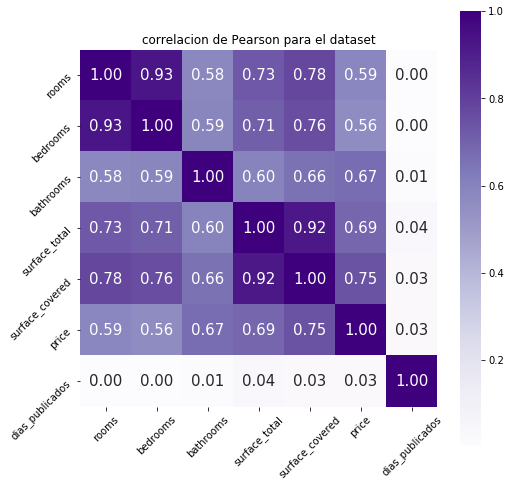

In [40]:
plt.figure(figsize=(8,8))
sns.heatmap(corr_total, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= datos_num.columns, 
           yticklabels= datos_num.columns,
           cmap= 'Purples')
plt.title("correlacion de Pearson para el dataset")
plt.xticks(rotation = 45)  
plt.yticks(rotation = 45)
plt.show()

Se observa que las correlaciones lineales mas altas se dan entre superficie total y superficie cubierta, y entre ambientes y dormitorios.

Las peores correlaciones lineales se observan para la variable dias publicados, con todas las demas, presentando un comportamiento completamente aleatorio y independiente de las demas caracteristicas.

Para el caso de los precios, que será nuestra variable a predecir en los modelos, las variables con una mayor correlación lineal son superficie cubierta, superficie total y baños.

Ahora revisaremos las correlaciones lineales para todas las caracteristicas diferenciando por los tipos de propiedad, Departamento, PH y Casa

In [41]:
datos_num_Departamento = datos[datos["property_type"]==instancias_propiedades.index[0]]
datos_num_Departamento = datos_num_Departamento.drop(["l1","l2","l3","property_type"], axis=1)
corr_Departamento = datos_num_Departamento.corr()

datos_num_PH = datos[datos["property_type"]==instancias_propiedades.index[2]]
datos_num_PH = datos_num_PH.drop(["l1","l2","l3","property_type"], axis=1)
corr_PH = datos_num_PH.corr()

datos_num_Casa = datos[datos["property_type"]==instancias_propiedades.index[1]]
datos_num_Casa = datos_num_Casa.drop(["l1","l2","l3","property_type"], axis=1)
corr_Casa = datos_num_Casa.corr()

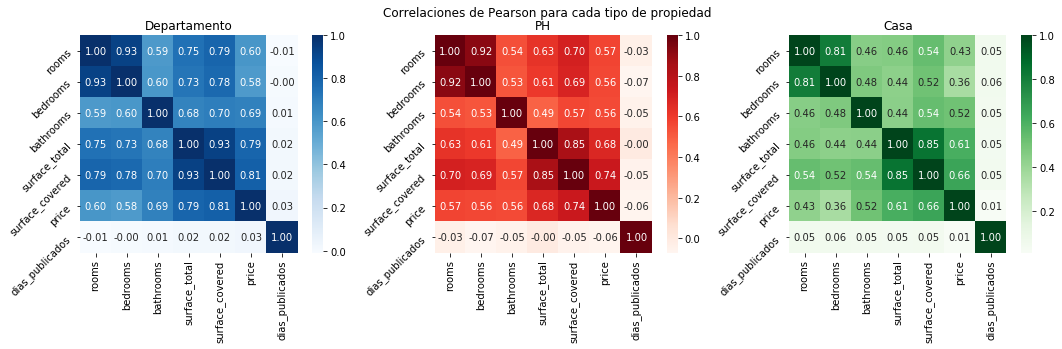

In [42]:
plt.figure(figsize = (18,4))
plt.suptitle("Correlaciones de Pearson para cada tipo de propiedad")
plt.subplot(1,3,1)
sns.heatmap(corr_Departamento, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 10},
           xticklabels= datos_num.columns, 
           yticklabels= datos_num.columns,
           cmap= 'Blues')
plt.title("Departamento")
plt.xticks(rotation = 90)  
plt.yticks(rotation = 45)
plt.subplot(1,3,2)
sns.heatmap(corr_PH, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 10},
           xticklabels= datos_num.columns, 
           yticklabels= datos_num.columns,
           cmap= 'Reds')
plt.title("PH")
plt.xticks(rotation = 90)  
plt.yticks(rotation = 45)
plt.subplot(1,3,3)
sns.heatmap(corr_Casa, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 10},
           xticklabels= datos_num.columns, 
           yticklabels= datos_num.columns,
           cmap= 'Greens')
plt.title("Casa")
plt.xticks(rotation = 90)  
plt.yticks(rotation = 45)
plt.show()

La correlaciones lineales mas fuertes se dan entre superficie total y superficie cubierta y entre ambientes y dormitorios, para los 3 tipos de propiedad, de igual manera que para el dataset completo.

las relaciones entre la variable dias publicados y las demas caracteristicas son totalmente independientes para cada tipo de propiedad.

Las caracteristicas con una correlación lineal mas fuerte con el precio son superficie total, superficie cubierta y baños.

A partir de este analisis por separado se puede concluir que ninguno de los 3 tipos de propiedad principales tiene un comportamiento diferente con respecto a sus correlaciones de Pearson, que el conjunto de datos completo.

Por último revisaremos otros coeficientes de correlación, como son el Spearman y el Kendall en el dataset.

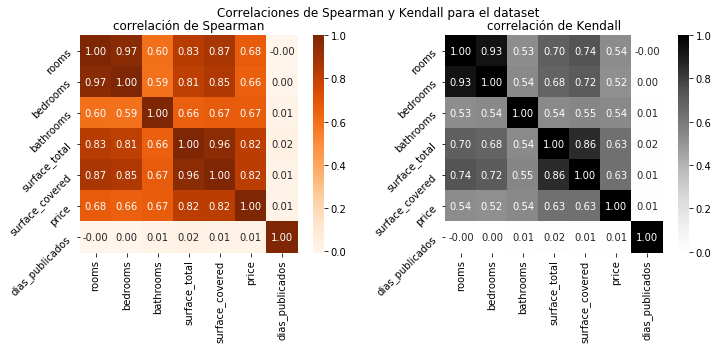

In [43]:
corr_spearman = datos_num.corr(method="spearman")
corr_kendall = datos_num.corr(method="kendall")

plt.figure(figsize = (12,4))
plt.suptitle("Correlaciones de Spearman y Kendall para el dataset")
plt.subplot(1,2,1)
sns.heatmap(corr_spearman, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 10},
           xticklabels= datos_num.columns, 
           yticklabels= datos_num.columns,
           cmap= 'Oranges')
plt.title("correlación de Spearman")
plt.xticks(rotation = 90)  
plt.yticks(rotation = 45)
plt.subplot(1,2,2)
sns.heatmap(corr_kendall, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 10},
           xticklabels= datos_num.columns, 
           yticklabels= datos_num.columns,
           cmap= 'Greys')
plt.title("correlación de Kendall")
plt.xticks(rotation = 90)  
plt.yticks(rotation = 45)
plt.show()

Podemos Observar que ambos coeficientes presentan un comportamiento completamente independiente de la variables dias publicados y las demas caracteristicas, al igual que se notó en el coeficiente de Pearson.

El coeficiente de Spearman presenta una alta correlación entre casi todas las demas caracteristicas, con valores inferiores pero aun adecuados para la caracteristica baños con las demas.

El coeficiente de Kendall presenta un comportamiento similar al de Spearman, pero con resultados un poco inferiores.

Como resultado de este análisis nos queda claro que la variable dias publicados no es util y podemos prescindir de ella

In [44]:
datos = datos.drop(["dias_publicados"], axis=1)

In [45]:
datos.shape

(76675, 10)

### 2.1 Desafío

Con el Dataset que se ha analizado y depurado vamos a responder algunas preguntas.

In [46]:
datosdesafio = datos.copy()

#### 1. Cuales barrios tienen el metro cuadrado mas caro en la ciudad de Buenos Aires, y cuales el mas barato.

In [47]:
datosdesafio["precio_metro_cuadrado"] = datosdesafio["price"]/datosdesafio["surface_total"]

In [48]:
tabla1 = pd.pivot_table(datosdesafio, values=["precio_metro_cuadrado"], index=["l3"], aggfunc=np.mean)
tabla1.sort_values(["precio_metro_cuadrado"],ascending=False, inplace = True)
tabla1.head(5)

,precio_metro_cuadrado
l3,
Puerto Madero,5378.637059
Las Cañitas,3590.000973
Palermo,3289.517472
Belgrano,3234.518987
Recoleta,3229.892064


Los 5 barrios con precio por metro cuadrado mas alto son Puerto Madero, Las Cañitas, Palermo, Belgrano y Recoleta

In [49]:
tabla1.sort_values(["precio_metro_cuadrado"],ascending=True, inplace = True)
tabla1.head(5)

,precio_metro_cuadrado
l3,
Villa Soldati,837.041224
Villa Lugano,1224.064973
Pompeya,1245.654456
Villa Riachuelo,1397.741763
Parque Avellaneda,1516.169801


Los 5 barrios con precio por metro cuadrado mas bajo son Villa Soldati, Villa Lugano, Pompeya, Villa Riachuelo y Parque Avellaneda

#### 2. En que barrio de Buenos Aires hay mas Departamentos, PHs y Casas

In [50]:
datosdesafio_Dep = datosdesafio[datosdesafio["property_type"]==instancias_propiedades.index[0]]
datosdesafio_Casa = datosdesafio[datosdesafio["property_type"]==instancias_propiedades.index[1]]
datosdesafio_PH = datosdesafio[datosdesafio["property_type"]==instancias_propiedades.index[2]]

In [51]:
print("El número de Departamentos por barrio es:")
print(datosdesafio_Dep["l3"].value_counts())

El número de Departamentos por barrio es:
Palermo                 10119
Almagro                  5907
Belgrano                 5281
Villa Crespo             4981
Caballito                4848
Recoleta                 4768
Barrio Norte             2863
Villa Urquiza            2325
Balvanera                1976
Flores                   1686
Nuñez                    1566
Parque Centenario        1128
Colegiales               1052
Puerto Madero             954
Villa del Parque          861
San Telmo                 795
San Cristobal             761
Retiro                    706
Villa Devoto              700
Saavedra                  668
San Nicolás               666
Once                      661
Monserrat                 646
Las Cañitas               604
Paternal                  586
Floresta                  539
Congreso                  507
Boedo                     493
Barracas                  485
Chacarita                 467
Centro / Microcentro      462
Parque Chacabuco          45

Los barrios con mas Departamentos son Palermo, Almagro y Belgrano, y los barrios con menos Departamentos son Catalinas, Villa Riachuelo y Villa Soldati

In [52]:
print("El número de PHs por barrio es:")
print(datosdesafio_PH["l3"].value_counts())

El número de PHs por barrio es:
Palermo                 998
Almagro                 734
Villa Crespo            725
Caballito               562
Villa Urquiza           468
Villa Devoto            358
Balvanera               343
Paternal                304
Villa del Parque        304
Flores                  273
Floresta                211
Saavedra                210
Boedo                   209
Villa Pueyrredón        193
Mataderos               187
Monte Castro            168
Parque Chacabuco        167
Belgrano                157
San Cristobal           156
Chacarita               152
Colegiales              149
Recoleta                134
Nuñez                   133
Liniers                 129
Barracas                125
Parque Patricios        115
Villa Luro              105
San Telmo               103
Parque Avellaneda        97
Villa Lugano             96
Parque Centenario        95
Villa General Mitre      90
Villa Santa Rita         83
Pompeya                  81
Once            

Los barrios con mas PHs son Palermo, Almagro y Villa Crespo, y los barrios con menos PHs son Tribunales, Retiro y Centro / Microcentro

In [53]:
print("El número de Casas por barrio es:")
print(datosdesafio_Casa["l3"].value_counts())

El número de Casas por barrio es:
Villa Devoto           168
Flores                 159
Caballito              107
Mataderos               93
Villa Urquiza           76
Villa Lugano            75
Liniers                 72
Floresta                67
Parque Chacabuco        67
Saavedra                65
Villa del Parque        65
Villa Pueyrredón        55
Belgrano                55
Pompeya                 53
Nuñez                   53
Parque Patricios        44
Palermo                 42
Boedo                   42
Villa General Mitre     41
Barracas                41
Paternal                40
Villa Luro              40
Versalles               37
Colegiales              37
Monte Castro            35
Parque Avellaneda       34
Coghlan                 27
Villa Ortuzar           27
Villa Crespo            26
San Cristobal           24
Parque Chas             22
Villa Santa Rita        22
Balvanera               20
Almagro                 19
Agronomía               15
Villa Soldati        

Los barrios con mas Casas son Villa Devoto, Flores y Caballito, y los barrios con menos Casas son Once, Congreso y Barrio Norte

#### 3. Que barrios de Buenos Aires tiene propiedades mas amplias y cuales tienen propiedades mas pequeñas.

In [54]:
tabla2 = pd.pivot_table(datosdesafio, values=["surface_total"], index=["l3"], aggfunc=np.mean)
tabla2.sort_values(["surface_total"],ascending=False, inplace = True)
tabla2.head(5)

,surface_total
l3,
Villa Soldati,156.403226
Pompeya,144.556650
Versalles,133.362245
Villa Riachuelo,122.117647
Mataderos,115.792060


Los 5 barrios con propiedades mas amplias son Villa Soldati, Pompeya, Versalles, Villa Riachuelo y Mataderos

In [55]:
tabla2.sort_values(["surface_total"],ascending=True, inplace = True)
tabla2.head(5)

,surface_total
l3,
San Nicolás,65.130307
Constitución,67.598945
Centro / Microcentro,68.578723
Tribunales,71.565217
Villa Crespo,71.701500


Los 5 barrios con propiedades mas pequeñas son San Nicolás, Constitución, Centro / Microcentro, Tribunales y Villa Crespo

#### 4. Que barrios de Buenos Aires tienen mas baños por número de ambientes

In [56]:
datosdesafio["bathroomsperrooms"] = datosdesafio["bathrooms"]/datosdesafio["rooms"]

In [57]:
table3 = pd.pivot_table(datosdesafio, values=["bathroomsperrooms"], index=["l3"], aggfunc=np.mean)
table3.sort_values(["bathroomsperrooms"],ascending=False, inplace = True)
table3.head()

,bathroomsperrooms
l3,
Puerto Madero,0.827655
Las Cañitas,0.689789
Nuñez,0.607456
Belgrano,0.600747
Retiro,0.592127


Los 5 barrios con mas baños por número de ambientes son Puerto Madero, Las Cañitas, Nuñez, Belgrano y Retiro

In [58]:
table3.sort_values(["bathroomsperrooms"],ascending=True, inplace = True)
table3.head()

,bathroomsperrooms
l3,
Villa Soldati,0.353955
Villa Lugano,0.404662
Pompeya,0.406562
Once,0.435547
Parque Patricios,0.454247


Los 5 barrios con menos baños por número de ambientes son Villa Soldati, Villa Lugano, Pompeya, Once y Parque Patricios

### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

In [59]:
datos_ck = pd.read_csv("DS_Proyecto_01_Datos_Properati.csv",sep=',');

In [60]:
datos_ck = datos_ck[((datos_ck.property_type==instancias_propiedades.index[0]) | 
               (datos_ck.property_type==instancias_propiedades.index[1]) |
               (datos_ck.property_type==instancias_propiedades.index[2])) & 
              (datos_ck.l2==instancias_region.index[0])]
datos_ck = datos_ck[(datos_ck["surface_total"] >= 15) & (datos_ck["surface_total"] <= 1000)]
datos_ck = datos_ck[datos_ck["price"] <= 4000000]
datos_ck = datos_ck.select_dtypes(include=[np.number])
datos_ck = datos_ck.drop(["lat","lon"], axis=1)
datos_ck.dropna(inplace = True)
datos_ck.shape

(81019, 6)

Tomaremos los datos que previamente se habian depurado de duplicados y valores extremos

In [61]:
datos.shape

(76675, 10)

Del análisis exploratorio, queda claro que cada tipo de propiedad tiene una distribución diferente de todas estas caracteristicas, por lo tanto obtener una variable clasificatoria para el tipo de propiedad que pueda ser usada en los modelos de ML mejoraría los resultados.

In [62]:
datos["property_type"] = datos["property_type"].astype('category')
datos["property_type_encooded"] = datos["property_type"].cat.codes

Del analisis exploratorio, vemos que el precio varia segun cada barrio de Buenos Aires, por lo tanto podemos obtener una variable clasificatoria para el barrio, pero esta no puede ser generada de manera aleatoria, o alfabética, ya que la utilidad de esta variable va a depender de la correlación que tenga esta variable numérica ordinaria con el precio.

Para esto organizaremos los barrios segun el precio promedio de sus propiedades, de menor a mayor, y por medio de una iteración asociaremos un entero desde el 1 al 56 para los barrios, desde el mas barato hasta el mas caro. Con estos datos crearemos un diccionario donde cada nombre de barrio asigne un número que lo clasifica y este diccionario se mapea en la variable l3.

In [63]:
table4 = pd.pivot_table(datos, values=["price"], index=["l3"], aggfunc=np.mean)
table4.sort_values(["price"],ascending=True, inplace = True)
barrios = []
barrios_encooded = []
for i ,barrio in enumerate(table4.index):
    barrios.append(barrio)
    barrios_encooded.append(i+1)
diccionario = dict(zip(barrios,barrios_encooded))
datos["l3_encooded"] = datos["l3"].map(diccionario).astype(int)

#### Importamos las librerias necesarias para desarrollar los modelos de machine learning

In [64]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve, learning_curve

### Modelo Benchmark - Regresión Lineal

El modelo LinearRegression es una buena opción para ser un Benchmark, ya que es un adecuado punto de referencia debido a su simplicidad.

De el análisis de las correlaciones tenemos claro que las correlaciones mas altas para el precio se dan con la superficie cubierta, la supercie total y el número de baños, mientras que las correlaciones mas debiles del precio se dan con el número de dormitorios y de ambientes. Es por esto que utilizaremos las primeras 3 caracteristicas junto el tipo de propiedad y el la clasificación para los barrios para generar la matriz de caracteristicas (X) y el precio para generar el vector objetivo (y)

Lo primero que haremos será segmentar los datos, para obtener un conjunto de entrenamiento (train set) y un conjunto de validación (test set). Es importante segmentar estos conjuntos de manera aleatoria para no generar algun sesgo al momento de crear los nuevos conjuntos. La segmentación la haremos con un 30% de los datos para validación

In [65]:
X = datos[["surface_total","surface_covered","bathrooms","property_type_encooded","l3_encooded"]]
y = datos["price"]
test_size=0.3
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size, random_state=42)

In [66]:
linear_model = LinearRegression()

linear_model.fit(X_train, y_train)

y_train_pred_m1 = linear_model.predict(X_train)
y_test_pred_m1 = linear_model.predict(X_test)

In [67]:
r2_train_m1 = r2_score(y_train, y_train_pred_m1)
r2_test_m1 = r2_score(y_test, y_test_pred_m1)
print(f'el R2 en el conjunto de entrenamiento es : {"{0:.3f}".format(r2_train_m1)}')
print(f'el R2 en el conjunto de validación es : {"{0:.3f}".format(r2_test_m1)}')

el R2 en el conjunto de entrenamiento es : 0.699
el R2 en el conjunto de validación es : 0.709


Utilizaremos la herramienta GridSearchCV para determinar los hyperparámetros mas adecuados del modelo. Evaluaremos los parámetros fit_intercept y normalize (ambos toman valores booleanos) con las métricas mae, rmse y r2.

El número de hojas para la validación cruzada será determinado como K = 1/test_size

In [68]:
cv = int(1/test_size)

grid_lr = GridSearchCV(estimator=LinearRegression(), 
                       param_grid={'fit_intercept': [True,False], 'normalize' : [True,False]},
                       cv=cv, scoring= {'mae' : 'neg_mean_absolute_error', 'mse' : 'neg_root_mean_squared_error',
                                       'r2' : 'r2'}, refit='r2', verbose=0, n_jobs=-1)

In [69]:
grid_lr.fit(X,y);

In [70]:
tabla = pd.DataFrame(grid_lr.cv_results_)
tabla = tabla[["param_fit_intercept","param_normalize","mean_test_mae","mean_test_mse","mean_test_r2"]]
tabla

,param_fit_intercept,param_normalize,mean_test_mae,mean_test_mse,mean_test_r2
0,True,True,-51963.731905,-77628.590764,0.701025
1,True,False,-51963.731905,-77628.590764,0.701025
2,False,True,-52652.572909,-79336.784820,0.687756
3,False,False,-52652.572909,-79336.784820,0.687756


Resumiendo los resultados obtenidos tenemos que los mejores valores de las métricas se obtienen para fit_intercept = True y normalize = False. Esto tambien lo podemos obtener de manera directa con el método best_params_

In [71]:
print(grid_lr.best_params_)

{'fit_intercept': True, 'normalize': False}


Tambien existen métodos para obtener el mejor estimador y el mejor puntaje, en la métrica seleccionada para evaluación (refit)

In [72]:
print(grid_lr.best_score_)

0.7010253648832423


In [73]:
print(grid_lr.best_estimator_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


Vemos que estamos utilizando los hyperparámetros optimizados para el modelo, por lo tanto no debemos volver a instanciarlo.

Podemos obtener los coeficientes para cada caracteristica y el intercepto, que determinan el modelo lineal del precio 

In [74]:
print(linear_model.coef_, linear_model.intercept_)

[   176.09377242   1444.17216687  50142.82102436 -15035.56494984
   2876.29350805] -75810.34952242911


Evaluaremos los resultados del modelo por medio de las métricas mae, rmse y r2

In [75]:
rmse_train_m1 = np.sqrt(mean_squared_error(y_train, y_train_pred_m1))
rmse_test_m1 = np.sqrt(mean_squared_error(y_test, y_test_pred_m1))
print(f'raíz del error cuadrático medio en el conjunto de entrenamiento es : {"{0:.3f}".format(rmse_train_m1)}')
print(f'raíz del error cuadrático medio en el conjunto de validación es : {"{0:.3f}".format(rmse_test_m1)}')

mae_train_m1 = mean_absolute_error(y_train, y_train_pred_m1)
mae_test_m1 = mean_absolute_error(y_test, y_test_pred_m1)
print(f'error medio absoluto en el conjunto de entrenamiento es : {"{0:.3f}".format(mae_train_m1)}')
print(f'error medio absoluto en el conjunto de validación es : {"{0:.3f}".format(mae_test_m1)}')

r2_train_m1 = r2_score(y_train, y_train_pred_m1)
r2_test_m1 = r2_score(y_test, y_test_pred_m1)
print(f'el R2 en el conjunto de entrenamiento es : {"{0:.3f}".format(r2_train_m1)}')
print(f'el R2 en el conjunto de validación es : {"{0:.3f}".format(r2_test_m1)}')

raíz del error cuadrático medio en el conjunto de entrenamiento es : 78303.410
raíz del error cuadrático medio en el conjunto de validación es : 75779.457
error medio absoluto en el conjunto de entrenamiento es : 52328.075
error medio absoluto en el conjunto de validación es : 51475.614
el R2 en el conjunto de entrenamiento es : 0.699
el R2 en el conjunto de validación es : 0.709


Obtenemos resultados para el rmse mayores mae, por lo tanto esto puede indicar la presencia de valores extremos (outliers), cuya incidencia se magnifica en las métricas rmse y mse.
Por último consideramos en r2 como la métrica de rendimiento a utilizar, ya que nos indica que tan bien trabaja el modelo con respecto a la linea base (media de todos los datos), esta por lo tsnto será nuestra métrica elegida para evaluación.

Por ultimo presentamos las gráficas del error obtenido y la de valores predichos vs valores reales para el precio

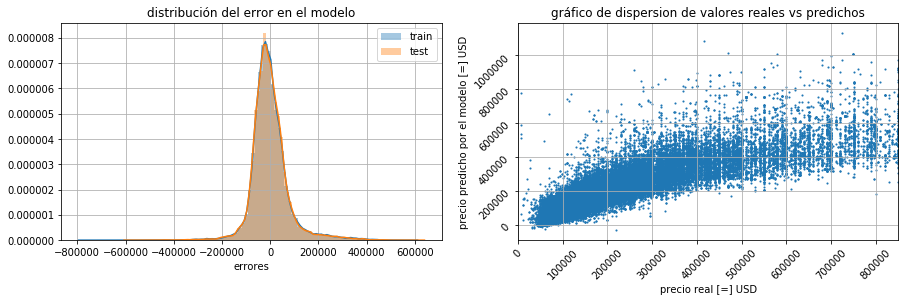

In [76]:
plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred_m1, bins = 100, label = 'train')
sns.distplot(y_test - y_test_pred_m1, bins = 100, label = 'test')
plt.title("distribución del error en el modelo")
plt.xlabel('errores')
plt.legend()
plt.grid()
plt.subplot(1,2,2)
plt.scatter(y, linear_model.predict(X), s = 1.2)
plt.title("gráfico de dispersion de valores reales vs predichos")
plt.xlabel('precio real [=] USD')
plt.ylabel('precio predicho por el modelo [=] USD')
plt.xlim(0,max_val6)
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.grid()
plt.show()

En la gráfica del error, observamos una amplia variabilidad para el error, lo que nos indica que este no es el modelo mas adecuado.

En la gráfica de dispersión observamos gran variabilidad en los resultados predichos (tal como nos lo indica el gráfico del error).

### Modelo Arbol de decisión

Tomaremos la misma matriz de caracteristicas y vector objetivo utilizados para el modelo benchmark y segmentaremos los conjuntos de la misma manera, utilizando un 30% de los datos para la validación.

In [77]:
X = datos[["surface_total","surface_covered","bathrooms","property_type_encooded","l3_encooded"]]
y = datos["price"]
test_size=0.3
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size, random_state=42)

In [78]:
tree_regressor = DecisionTreeRegressor(max_depth=3, random_state=42)
                                       
tree_regressor.fit(X_train,y_train)

y_train_pred_m2 = tree_regressor.predict(X_train)
y_test_pred_m2 = tree_regressor.predict(X_test)

El modelo de arbol de desición tiene la caracteristica feature_importances_. vamos a utilizarla para obtener un gráfico de barras que nos permita visualizar la importancia de cada caracterstica en el modelo

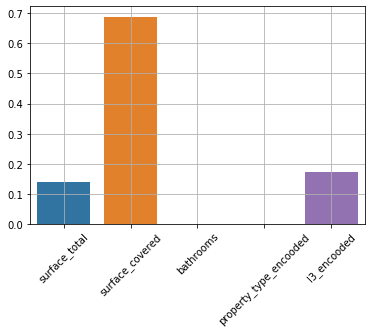

In [79]:
importancia = tree_regressor.feature_importances_
columnas = X.columns
sns.barplot(columnas,importancia)
plt.xticks(rotation = 45)
plt.grid()
plt.show()

Vemos que la caracteristica mas importante para obtener un modelo del precio es superficie cubierta, seguido de la clasificación del barrio y la superficie total. el número de baños y el tipo de propiedad parece no tener mucho peso en el modelo.

A continuación observamos el R2 del modelo obtenido.

In [80]:
r2_train_m2 = r2_score(y_train, y_train_pred_m2)
r2_test_m2 = r2_score(y_test, y_test_pred_m2)
print(f'el R2 en el conjunto de entrenamiento es : {"{0:.3f}".format(r2_train_m2)}')
print(f'el R2 en el conjunto de validación es : {"{0:.3f}".format(r2_test_m2)}')

el R2 en el conjunto de entrenamiento es : 0.708
el R2 en el conjunto de validación es : 0.714


Emplearemos la curva de validación para verificar la complejidad (profundidad máxima) mas indicada para el modelo.

él número de hojas para la validación cruzada será determinado como K = 1/test_size

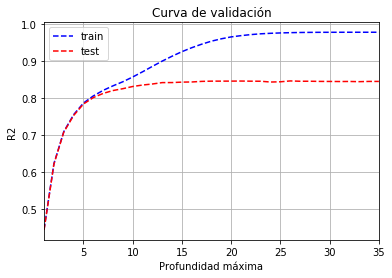

In [81]:
cv = int(1/test_size)

param_range = np.arange(1,36)
train_scores, test_scores = validation_curve(tree_regressor, X, y, param_name="max_depth", 
                                             param_range=param_range,scoring="r2",cv=cv)
train_scores_av = np.mean(train_scores,axis=1)
test_scores_av = np.mean(test_scores,axis=1)

plt.plot(param_range,train_scores_av,"b--",label="train")
plt.plot(param_range,test_scores_av,"r--",label="test")
plt.legend()
plt.title("Curva de validación")
plt.xlabel("Profundidad máxima")
plt.ylabel("R2")
plt.xlim(1,35)
plt.grid()
plt.show()

Se observa para una baja complejidad (bajos valores de profundidad máxima) el modelo se encuentra subajustado (underfitting), en una región de alto bias y para valores una alta complejidad (altos valores de profundidad máxima) el modelo se encuentra sobre ajustado (overfitting), en una región de alta varianza.

la región intermedia, donde el modelo tiene una complejidad ideal, que es poco distinguible en la gráfica, está dada para una profundidad máxima entre 25 y 28 aproximadamente.

Para obtener el valor óptimo de profundidad máxima utilizaremos la herramienta GridSearchCV

In [82]:
grid_tree = GridSearchCV(estimator=tree_regressor,
                        param_grid={'max_depth': [i for i in range(1,35)]}, cv=cv,
                        scoring={'mae' : 'neg_mean_absolute_error', 'mse' : 'neg_root_mean_squared_error','r2' : 'r2'},
                        refit='r2', verbose=0, n_jobs=-1)

In [83]:
grid_tree.fit(X,y);

In [84]:
tabla = pd.DataFrame(grid_tree.cv_results_)
tabla = tabla[["param_max_depth","mean_test_mae","mean_test_mse","mean_test_r2"]].iloc[23:28,:]
tabla

,param_max_depth,mean_test_mae,mean_test_mse,mean_test_r2
23,24,-27652.685055,-56084.019038,0.843674
24,25,-27574.718995,-55976.543187,0.844343
25,26,-27388.480975,-55561.763846,0.846641
26,27,-27377.766971,-55718.547956,0.845784
27,28,-27404.889876,-55711.880914,0.845826


Se observa que para max_depth = 26, las métricas obtienen los mejores resultados

In [85]:
print(grid_tree.best_params_)

{'max_depth': 26}


In [86]:
print(grid_tree.best_score_)

0.8466412745483591


In [87]:
print(grid_tree.best_estimator_)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=26,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')


Instanciaremos nuevamente el modelo, utilizando el valor optimizado para el hyperparámetro max_depth

In [88]:
tree_regressor = DecisionTreeRegressor(max_depth=26, random_state=42)
                                       
tree_regressor.fit(X_train,y_train)

y_train_pred_m2 = tree_regressor.predict(X_train)
y_test_pred_m2 = tree_regressor.predict(X_test)

In [89]:
rmse_train_m2 = np.sqrt(mean_squared_error(y_train, y_train_pred_m2))
rmse_test_m2 = np.sqrt(mean_squared_error(y_test, y_test_pred_m2))
print(f'raíz del error cuadrático medio en el conjunto de entrenamiento es : {"{0:.3f}".format(rmse_train_m2)}')
print(f'raíz del error cuadrático medio en el conjunto de validación es : {"{0:.3f}".format(rmse_test_m2)}')

mae_train_m2 = mean_absolute_error(y_train, y_train_pred_m2)
mae_test_m2 = mean_absolute_error(y_test, y_test_pred_m2)
print(f'error medio absoluto en el conjunto de entrenamiento es : {"{0:.3f}".format(mae_train_m2)}')
print(f'error medio absoluto en el conjunto de validación es : {"{0:.3f}".format(mae_test_m2)}')

r2_train_m2 = r2_score(y_train, y_train_pred_m2)
r2_test_m2 = r2_score(y_test, y_test_pred_m2)
print(f'el R2 en el conjunto de entrenamiento es : {"{0:.3f}".format(r2_train_m2)}')
print(f'el R2 en el conjunto de validación es : {"{0:.3f}".format(r2_test_m2)}')

raíz del error cuadrático medio en el conjunto de entrenamiento es : 21213.083
raíz del error cuadrático medio en el conjunto de validación es : 54599.258
error medio absoluto en el conjunto de entrenamiento es : 8958.716
error medio absoluto en el conjunto de validación es : 26785.633
el R2 en el conjunto de entrenamiento es : 0.978
el R2 en el conjunto de validación es : 0.849


nuevamente obtenemos mejores valores para mae que para el rmse, lo que indica la existencia de valores estremos.

Ahora realizamos la curva de aprendizaje para el modelo, con el fin de verificar que los datos suministrados son suficientes.

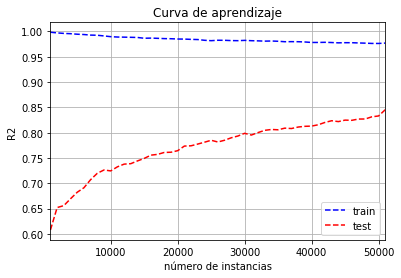

In [90]:
train_sizes = np.arange(1000,52000,1000)
train_size, train_scores, test_scores = learning_curve(tree_regressor, X, y, cv=cv, 
                                                       train_sizes=train_sizes, scoring="r2")
train_scores_av = np.mean(train_scores,axis=1)
test_scores_av = np.mean(test_scores,axis=1)

plt.plot(train_size,train_scores_av,"b--",label="train")
plt.plot(train_size,test_scores_av,"r--",label="test")
plt.legend()
plt.title("Curva de aprendizaje")
plt.xlabel("número de instancias")
plt.ylabel("R2")
plt.xlim(1000,51000)
plt.grid()
plt.show()

En la curva de aprendizaje observamos que para pocas instancias, el modelo se encuentra en la región de alta varianza (overfitting), y al aumentar el número de instancias el rendimiento de los conjuntos de entrenamiento y validación se van acercando, conformando un modelo mas adecuado, segun la complejidad del mismo. Del análisis de la gráfica determinamos que tiene un número adecuado de datos

Por ultimo presentamos las gráficas del error obtenido y la de valores predichos vs valores reales para el precio

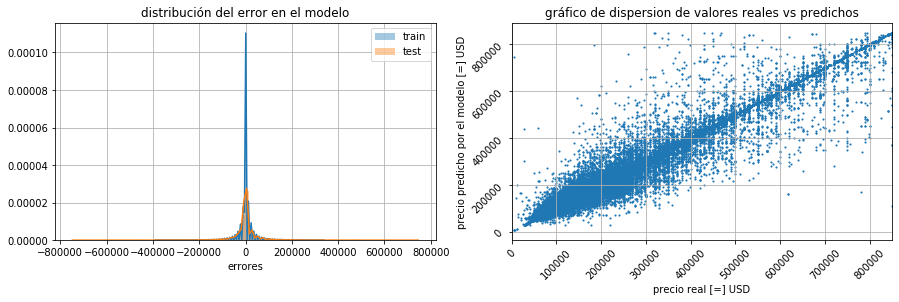

In [91]:
plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred_m2, bins = 100, label = 'train')
sns.distplot(y_test - y_test_pred_m2, bins = 100, label = 'test')
plt.title("distribución del error en el modelo")
plt.xlabel('errores')
plt.legend()
plt.grid()
plt.subplot(1,2,2)
plt.scatter(y, tree_regressor.predict(X), s = 1.2)
plt.title("gráfico de dispersion de valores reales vs predichos")
plt.xlabel('precio real [=] USD')
plt.ylabel('precio predicho por el modelo [=] USD')
plt.xlim(0,max_val6)
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.grid()
plt.show()

Si bien la distribución del error es mejor que para el modelo benchmark, se observa una variabilidad en los valores extremos calculados de la distribución del error.

### Modelo K vecinos mas cercanos

Tomaremos la misma matriz de caracteristicas y vector objetivo utilizados. Segmentaremos los conjuntos de la misma manera, utilizando un 30% de los datos para la validación.

In [92]:
X = datos[["surface_total","surface_covered","bathrooms","property_type_encooded","l3_encooded"]]
y = datos["price"]
test_size=0.3
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size, random_state=42)

In [93]:
knn_regressor = KNeighborsRegressor(n_neighbors=5)
                                       
knn_regressor.fit(X_train,y_train)

y_train_pred_m3 = knn_regressor.predict(X_train)
y_test_pred_m3 = knn_regressor.predict(X_test)

A continuación observamos el R2 del modelo obtenido.

In [94]:
r2_train = r2_score(y_train, y_train_pred_m3)
r2_test = r2_score(y_test, y_test_pred_m3)
print(f'el R2 en el conjunto de entrenamiento es : {"{0:.3f}".format(r2_train)}')
print(f'el R2 en el conjunto de validación es : {"{0:.3f}".format(r2_test)}')

el R2 en el conjunto de entrenamiento es : 0.895
el R2 en el conjunto de validación es : 0.838


Emplearemos la curva de validación para verificar la complejidad (número de vecinos) mas indicada para el modelo.

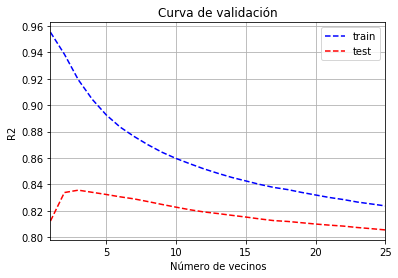

In [95]:
cv = int(1/test_size)

param_range = np.arange(1,26)
train_scores, test_scores = validation_curve(knn_regressor, X, y, param_name="n_neighbors", 
                                             param_range=param_range,scoring="r2",cv=cv)
train_scores_av = np.mean(train_scores,axis=1)
test_scores_av = np.mean(test_scores,axis=1)

plt.plot(param_range,train_scores_av,"b--",label="train")
plt.plot(param_range,test_scores_av,"r--",label="test")
plt.legend()
plt.title("Curva de validación")
plt.xlabel("Número de vecinos")
plt.ylabel("R2")
plt.xlim(1,25)
plt.grid()
plt.show()

Se observa para una baja complejidad (bajo número de vecinos) el modelo se encuentra sobreajustado, en la región de alta varianza, y para una alta complejidad (alto número de vecinos) el modelo se encuentra subajustado, en la región de alto bias.
Por lo tanto los modelos de Arbol de desición y K vecinos mas cercanos tienen comportamientos opuestos para la curva de validación.

la región intermedia, donde el modelo tiene una complejidad ideal, está dada para un número de vecinos entre 2 y 4 aproximadamente.

Para obtener el valor óptimo de número de vecinos utilizaremos la herramienta GridSearchCV

In [96]:
grid_knn = GridSearchCV(estimator=knn_regressor,
                        param_grid={'n_neighbors': [i for i in range(1,25)]}, cv=cv,
                        scoring={'mae' : 'neg_mean_absolute_error', 'mse' : 'neg_root_mean_squared_error','r2' : 'r2'},
                        refit='r2', verbose=0, n_jobs=-1)

In [97]:
grid_knn.fit(X,y);

In [98]:
tabla = pd.DataFrame(grid_knn.cv_results_)
tabla = tabla[["param_n_neighbors","mean_test_mae","mean_test_mse","mean_test_r2"]].iloc[0:5,:]
tabla

,param_n_neighbors,mean_test_mae,mean_test_mse,mean_test_r2
0,1,-29761.324615,-61469.854163,0.812390
1,2,-30695.391682,-57844.501115,0.833917
2,3,-31482.959586,-57529.523639,0.835715
3,4,-32101.966631,-57824.527751,0.834083
4,5,-32675.885326,-58111.086577,0.832448


Se observa que para n_neighbors = 3, las métricas obtienen los mejores resultados

In [99]:
print(grid_knn.best_params_)

{'n_neighbors': 3}


In [100]:
print(grid_knn.best_score_)

0.835714681721705


In [101]:
print(grid_knn.best_estimator_)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')


In [102]:
knn_regressor = KNeighborsRegressor(n_neighbors=3)
                                       
knn_regressor.fit(X_train,y_train)

y_train_pred_m3 = knn_regressor.predict(X_train)
y_test_pred_m3 = knn_regressor.predict(X_test)

In [103]:
rmse_train_m3 = np.sqrt(mean_squared_error(y_train, y_train_pred_m3))
rmse_test_m3 = np.sqrt(mean_squared_error(y_test, y_test_pred_m3))
print(f'raíz del error cuadrático medio en el conjunto de entrenamiento es : {"{0:.3f}".format(rmse_train_m3)}')
print(f'raíz del error cuadrático medio en el conjunto de validación es : {"{0:.3f}".format(rmse_test_m3)}')

mae_train_m3 = mean_absolute_error(y_train, y_train_pred_m3)
mae_test_m3 = mean_absolute_error(y_test, y_test_pred_m3)
print(f'error medio absoluto en el conjunto de entrenamiento es : {"{0:.3f}".format(mae_train_m3)}')
print(f'error medio absoluto en el conjunto de validación es : {"{0:.3f}".format(mae_test_m3)}')

r2_train_m3 = r2_score(y_train, y_train_pred_m3)
r2_test_m3 = r2_score(y_test, y_test_pred_m3)
print(f'el R2 en el conjunto de entrenamiento es : {"{0:.3f}".format(r2_train_m3)}')
print(f'el R2 en el conjunto de validación es : {"{0:.3f}".format(r2_test_m3)}')

raíz del error cuadrático medio en el conjunto de entrenamiento es : 40134.525
raíz del error cuadrático medio en el conjunto de validación es : 56241.599
error medio absoluto en el conjunto de entrenamiento es : 21610.806
error medio absoluto en el conjunto de validación es : 30613.916
el R2 en el conjunto de entrenamiento es : 0.921
el R2 en el conjunto de validación es : 0.840


obtenemos mejores valores para mae que para el rmse, lo que indica la existencia de valores estremos.

Ahora realizamos la curva de aprendizaje para el modelo.

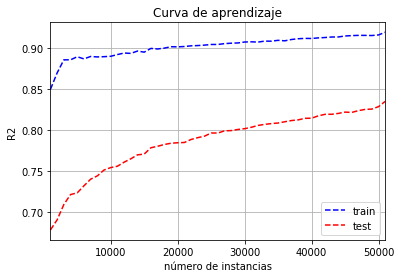

In [104]:
train_sizes = np.arange(1000,52000,1000)
train_size, train_scores, test_scores = learning_curve(knn_regressor, X, y, cv=cv, 
                                                       train_sizes=train_sizes, scoring="r2")
train_scores_av = np.mean(train_scores,axis=1)
test_scores_av = np.mean(test_scores,axis=1)

plt.plot(train_size,train_scores_av,"b--",label="train")
plt.plot(train_size,test_scores_av,"r--",label="test")
plt.legend()
plt.title("Curva de aprendizaje")
plt.xlabel("número de instancias")
plt.ylabel("R2")
plt.xlim(1000,51000)
plt.grid()
plt.show()

Por ultimo presentamos las gráficas del error obtenido y la de valores predichos vs valores reales para el precio

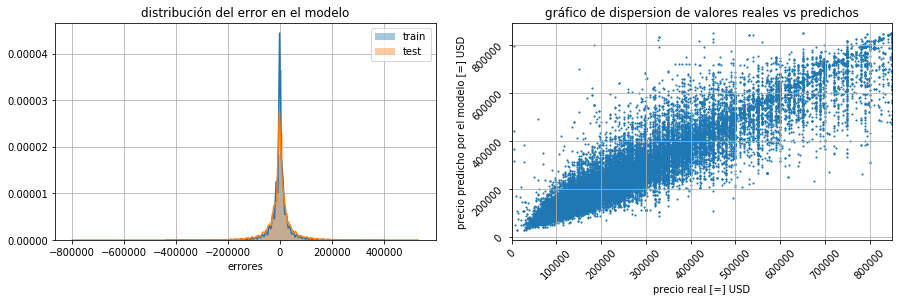

In [105]:
plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred_m3, bins = 100, label = 'train')
sns.distplot(y_test - y_test_pred_m3, bins = 100, label = 'test')
plt.title("distribución del error en el modelo")
plt.xlabel('errores')
plt.legend()
plt.grid()
plt.subplot(1,2,2)
plt.scatter(y, knn_regressor.predict(X), s = 1.2)
plt.title("gráfico de dispersion de valores reales vs predichos")
plt.xlabel('precio real [=] USD')
plt.ylabel('precio predicho por el modelo [=] USD')
plt.xlim(0,max_val6)
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.grid()
plt.show()

Se observa una distribución del error con una mayor varianza que el modelo de árbol, y la dispersión de los precios reales vs predichos tambian se observa menos idealizada que la obtenida en el modelo de árbol

### Comparativo de los modelos

In [106]:
Comparativo = {"Regresión lineal" : [rmse_train_m1,rmse_test_m1,mae_train_m1,mae_test_m1,r2_train_m1,r2_test_m1],
               "Árbol de decisión" : [rmse_train_m2,rmse_test_m2,mae_train_m2,mae_test_m2,r2_train_m2,r2_test_m2],
               "K Vecinos mas cercanos" : [rmse_train_m3,rmse_test_m3,mae_train_m3,mae_test_m3,r2_train_m3,r2_test_m3]}

In [107]:
Comparativo = pd.DataFrame.from_dict(Comparativo, orient='index',
                                     columns=["rmse_train","rmse_test","mae_train","mae_test","r2_train","r2_test"])
Comparativo

,rmse_train,rmse_test,mae_train,mae_test,r2_train,r2_test
Regresión lineal,78303.410241,75779.457278,52328.075414,51475.613795,0.699201,0.708793
Árbol de decisión,21213.082572,54599.258287,8958.716224,26785.632605,0.977924,0.848827
K Vecinos mas cercanos,40134.524945,56241.598933,21610.805907,30613.915591,0.920977,0.839596


In [108]:
Comparativo["rmse"] = Comparativo[["rmse_train","rmse_test"]].mean(axis=1)
Comparativo["mae"] = Comparativo[["mae_train","mae_test"]].mean(axis=1)
Comparativo["r2"] = Comparativo[["r2_train","r2_test"]].mean(axis=1)
Comparativo.iloc[:,6:]

,rmse,mae,r2
Regresión lineal,77041.433760,51901.844605,0.703997
Árbol de decisión,37906.170429,17872.174415,0.913376
K Vecinos mas cercanos,48188.061939,26112.360749,0.880287


A partir de los valores de las métricas para los conjuntos de entrenamiento y validación, hallamos sus valores como el promedio para ambos conjuntos y obtenemos los resultados para las métricas rmse, mae y R2 para cada uno de los 3 modelos.

Si bien nuestra métrica elegida es R2, vamos a apoyarnos en los resultados de las otras dos para revalidar la desición tomada con la métrica elegida. Buscamos el modelo que minimice las métricas rmse y mae, y maximice R2. Observamos que el modelo que mejores resultados tiene es árbol de desición, seguido por K vecinos mas cercanos y por último la regresión lineal (benchmark).

### Consideraciones de Mejora

Cabe resaltar que el modelo elegido, árbol de desición, a pesar de ser el mejor de los 3, presenta aun cierta variabilidad representada en los extremos de la distribución del error y la dispersión de los valores reales vs predichos para el precio.

Utilizar las coordenadas de latitud y longitud, en lugar de la ubicación por barrios, podría ser mas util para determinar el precio, ya que en muchas ocacioens un mismo barrio puede tener otros sectores, algunos muy buenos y otros no tanto. Tal vez apartir de estas dos variables se podría generar una nueva que fuera de alguna manera la parametrización de las dos primeras con respecto al precio.